<a href="https://colab.research.google.com/github/luisfelipe100/PCD/blob/main/PCD_Tarea6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython

# Comparación de la letra A pronunciada de distintas formas por distintas personas.

In [2]:
IPython.display.Audio('/content/ElafAlsaeedF-15Shared-20210212-1.wav')

In [3]:
IPython.display.Audio('/content/MahdiAlsaeed-07Shared-20210212-1.wav')

In [5]:
y1, sr1 = librosa.load('/content/ElafAlsaeedF-15Shared-20210212-1.wav')
y2, sr2 = librosa.load('/content/MahdiAlsaeed-07Shared-20210212-1.wav')
# y: serie de tiempo de la frecuencia
# sr: frecuencia de muestreo

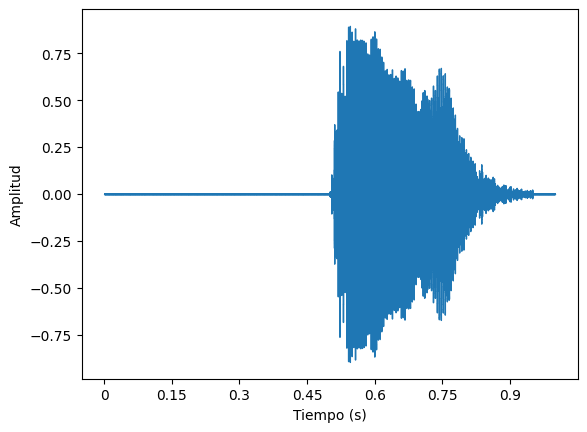

In [6]:
plt.figure()
librosa.display.waveshow(y1, sr=sr1)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

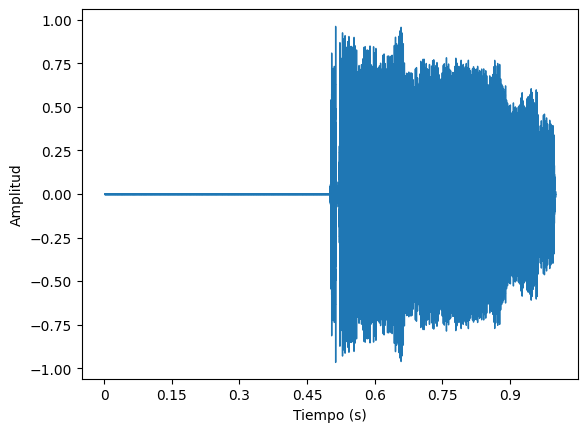

In [7]:
plt.figure()
librosa.display.waveshow(y2, sr=sr2)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

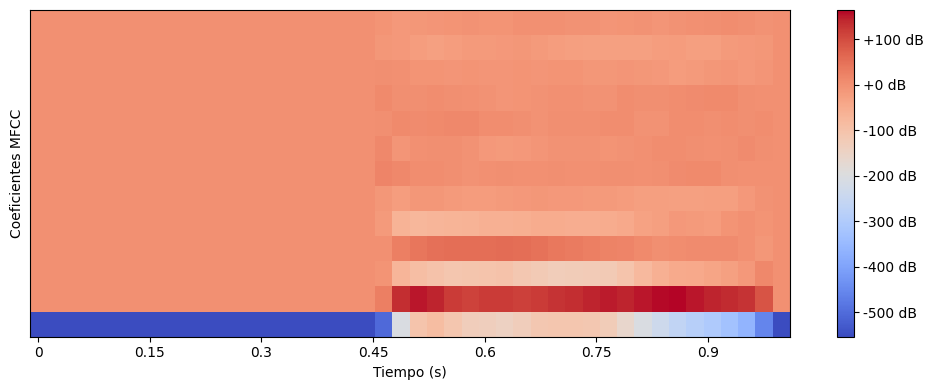

In [8]:
# Calcular MFCC
mfccs = librosa.feature.mfcc(y=y1, sr=sr1, n_mfcc=13)

# Visualizar MFCC
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.xlabel('Tiempo (s)')
plt.ylabel('Coeficientes MFCC')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

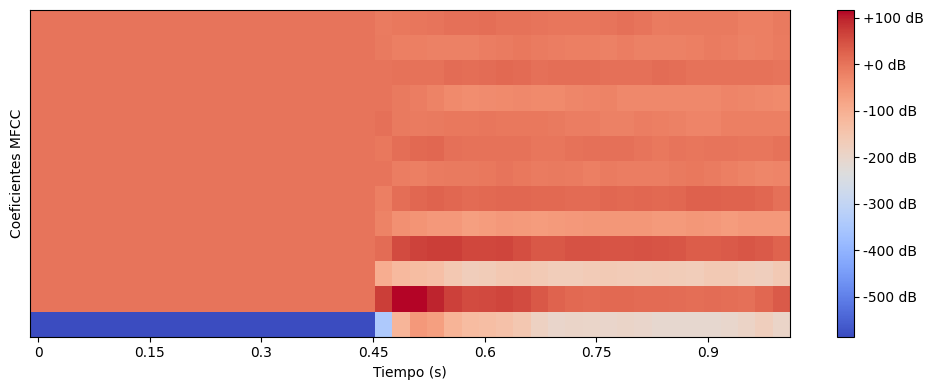

In [9]:
# Calcular MFCC
mfccs = librosa.feature.mfcc(y=y2, sr=sr2, n_mfcc=13)

# Visualizar MFCC
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.xlabel('Tiempo (s)')
plt.ylabel('Coeficientes MFCC')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

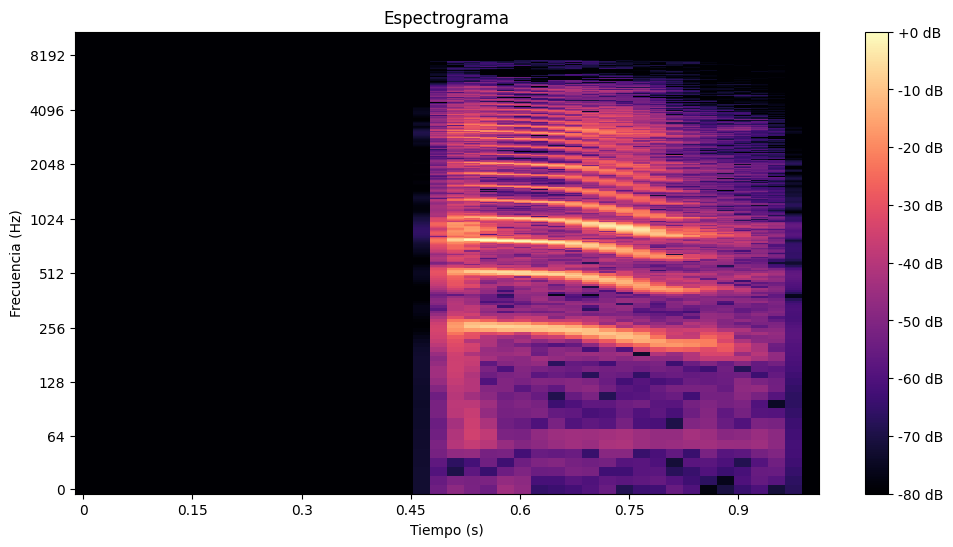

In [15]:
# Calcular el espectrograma de la señal de audio
S1 = librosa.stft(y1)
S_db1 = librosa.amplitude_to_db(np.abs(S1), ref=np.max)

# Visualizar el espectrograma
plt.figure(figsize=(12, 6))
librosa.display.specshow(S_db1, sr=sr1, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.show()

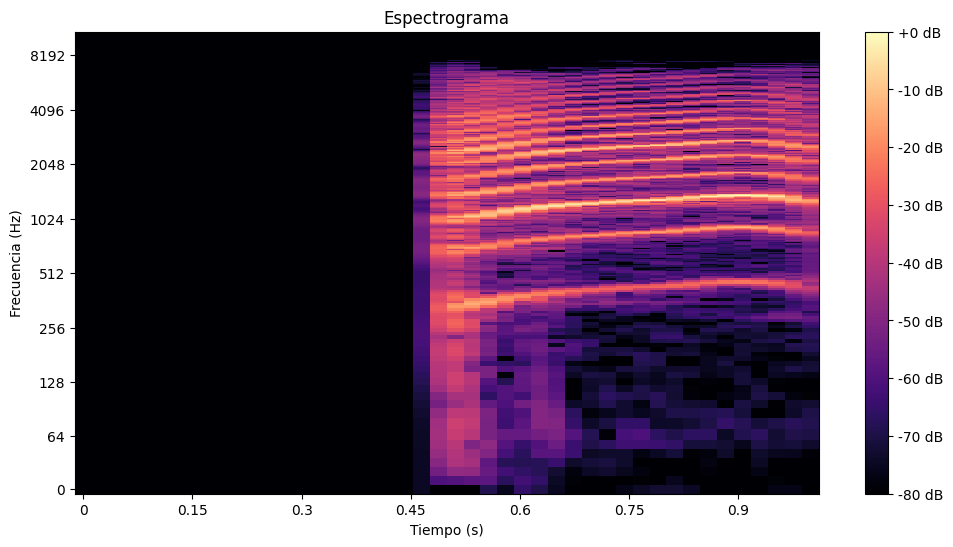

In [16]:
# Calcular el espectrograma de la señal de audio
S2 = librosa.stft(y2)
S_db2 = librosa.amplitude_to_db(np.abs(S2), ref=np.max)

# Visualizar el espectrograma
plt.figure(figsize=(12, 6))
librosa.display.specshow(S_db2, sr=sr2, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.show()

In [13]:
# Obtener las frecuencias y los tiempos del espectrograma
frequencies1 = librosa.fft_frequencies(sr=sr1)
len(frequencies1)

1025

In [14]:
frequencies2 = librosa.fft_frequencies(sr=sr1)
len(frequencies2)

1025

In [18]:
# Conversión a tiempo de las frecuencias de muestreo
times1 = librosa.frames_to_time(np.arange(S_db1.shape[1]), sr=sr1)

# Sumar las amplitudes a lo largo del tiempo para cada frecuencia
sum_amplitudes1 = np.sum(S_db1, axis=1)

# Seleccionar las 10 frecuencias más representativas
top_n = 10
top_indices1 = np.argsort(sum_amplitudes1)[-top_n:][::-1]
top_frequencies1 = frequencies1[top_indices1]
top_amplitudes1 = sum_amplitudes1[top_indices1]
top_amplitudes1

array([-2348.4456, -2380.342 , -2387.5337, -2396.8005, -2414.4377,
       -2422.5427, -2430.2273, -2439.8184, -2445.092 , -2448.971 ],
      dtype=float32)

In [19]:
# Conversión a tiempo de las frecuencias de muestreo
times2 = librosa.frames_to_time(np.arange(S_db2.shape[1]), sr=sr2)

# Sumar las amplitudes a lo largo del tiempo para cada frecuencia
sum_amplitudes2 = np.sum(S_db2, axis=1)

# Seleccionar las 10 frecuencias más representativas
top_n = 10
top_indices2 = np.argsort(sum_amplitudes2)[-top_n:][::-1]
top_frequencies2 = frequencies2[top_indices2]
top_amplitudes2 = sum_amplitudes2[top_indices2]
top_amplitudes2

array([-2284.4624, -2298.1716, -2304.3264, -2319.0977, -2319.5312,
       -2319.9038, -2322.543 , -2324.2537, -2324.8591, -2329.3079],
      dtype=float32)

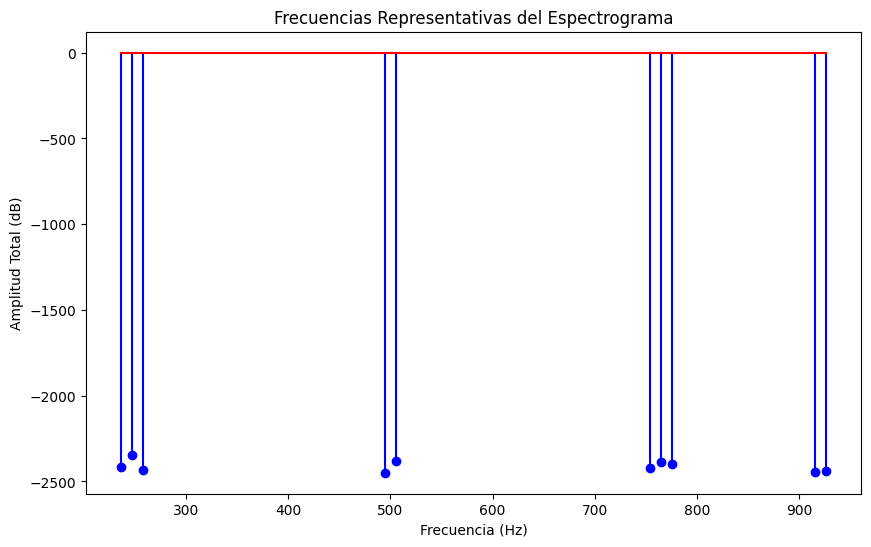

In [20]:
# Visualizar las frecuencias representativas como líneas
plt.figure(figsize=(10, 6))
plt.stem(top_frequencies1, top_amplitudes1, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud Total (dB)')
plt.title('Frecuencias Representativas del Espectrograma')
plt.show()

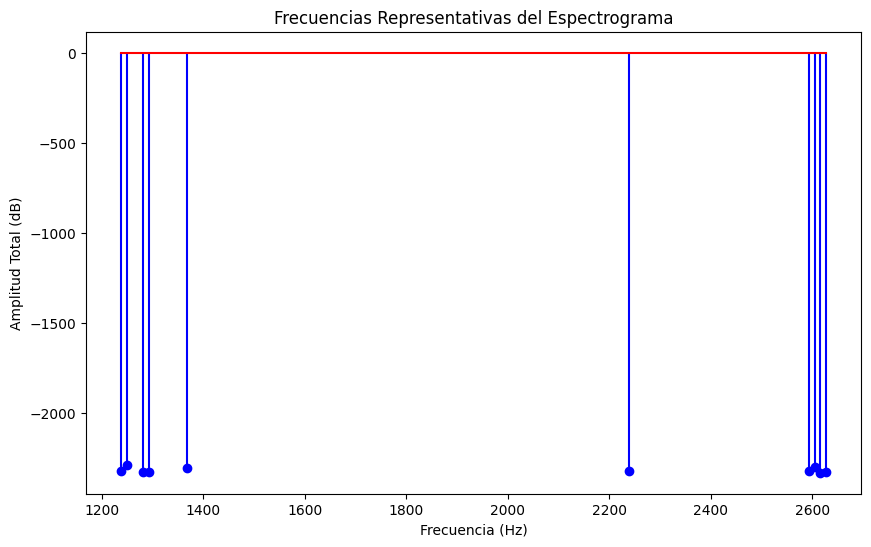

In [21]:
# Visualizar las frecuencias representativas como líneas
plt.figure(figsize=(10, 6))
plt.stem(top_frequencies2, top_amplitudes2, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud Total (dB)')
plt.title('Frecuencias Representativas del Espectrograma')
plt.show()